## Libraries

In [383]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Import Data

In [149]:
# Data Link: https://drive.google.com/file/d/1InQs-aVW-rlirfSzUAwvZfS5zT56fd1I/view
data = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

In [52]:
data.head(10)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8
5,U006,10,85,6,12,180,25
6,U007,6,75,4,5,130,15
7,U008,9,95,2,9,150,45
8,U009,4,65,1,2,80,10
9,U010,3,55,0,4,95,6


In [54]:
data.tail(10)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
90,U091,7,88,6,9,88,31
91,U092,9,55,6,2,128,36
92,U093,8,57,5,7,106,11
93,U094,1,76,1,13,153,48
94,U095,8,58,2,17,144,12
95,U096,8,86,6,14,98,22
96,U097,3,82,3,1,159,24
97,U098,1,91,1,9,92,34
98,U099,8,93,0,1,160,40
99,U100,3,73,3,16,82,29


## Clean Data

In [56]:
# Informs each column is correct data type and there are no null values.
# RangeIndex: 100 entries means we should see 100 non-null for each column. We do.
data.info()
# data.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [171]:
# User ID needs to be a float for clustering portion of work
for index, row in data.iterrows():
    string = str(row["User ID"])
    if ('U' in string):
        split_string = string.replace("U", "")
        # data["User ID"][index] = split_string[0][:]
        data.loc[index, "User ID"] = split_string

In [177]:
data.head(5)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,001,5,80,3,10,120,20
1,002,8,60,1,8,100,35
2,003,3,90,0,6,90,5
3,004,7,70,2,15,140,40
4,005,2,50,5,3,60,8


## Data Analysis

In [179]:
# Insight for the 100th user id. 'Testing the waters' with data sets filtering capabilities
data[data['User ID'] == '100']

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
99,100,3,73,3,16,82,29


In [111]:
data.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


#### Which users are most likely to purchase virtual merchandise?

In [102]:
data['Virtual Merchandise Purchases'].value_counts()

Virtual Merchandise Purchases
0    20
3    17
2    17
1    14
6    14
5    12
4     6
Name: count, dtype: int64

#### Visually comparing .head(10) and .tail(10) provides no key variable to explain the question.


In [425]:
data.sort_values(by = ['Virtual Merchandise Purchases'], ascending = False).head(10)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster Group
52,053,10,88,6,6,106,1,0
35,036,1,86,6,15,117,32,0
78,079,7,69,6,5,185,23,2
60,061,3,94,6,5,179,25,0
82,083,2,74,6,16,176,47,4
22,023,8,82,6,15,79,15,0
48,049,2,75,6,13,65,12,0
10,011,7,84,6,16,163,9,0
90,091,7,88,6,9,88,31,0
91,092,9,55,6,2,128,36,2


In [429]:
data.sort_values(by = ['Virtual Merchandise Purchases'], ascending = False).tail(10)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster Group
80,081,8,60,0,8,107,48,1
51,052,2,81,0,7,153,45,4
15,016,10,90,0,4,158,9,3
17,018,7,56,0,8,72,31,1
37,038,3,63,0,17,108,42,1
30,031,5,71,0,3,145,19,3
28,029,6,93,0,16,125,31,4
25,026,5,73,0,0,174,1,3
61,062,1,64,0,5,122,9,3
81,082,5,77,0,4,148,34,4


C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[800.0, 649.3349119611761, 566.6410670147944, 490.1880123735806, 434.1186506309767, 409.3161520653847, 392.8461426398714, 370.6743982885377, 364.1491603766369, 334.80956224589715]


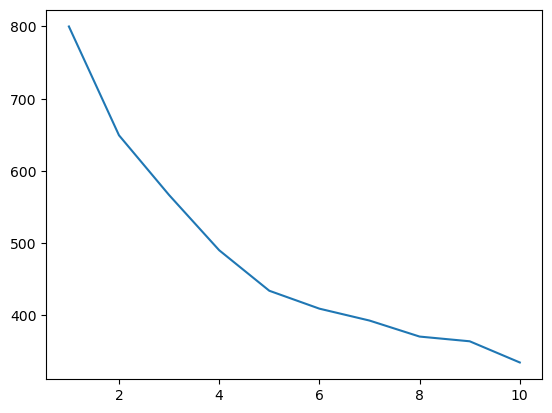

In [435]:
# Apply clustering to identify key insights about user behavior. 
# first, make the df scaled means are 0
scaled_data = StandardScaler().fit_transform(data)

# next, want to find the best number of clusters to use
inertias = []
for i in range(1,11):
    kmeans_data = KMeans(init='random', n_clusters=i, n_init=10, random_state=1610)
    kmeans_data.fit(scaled_data)
    inertias.append(kmeans_data.inertia_)

print(inertias)
plt.plot(range(1,11), inertias)

In [237]:
# Plot above reason to use 5 clusters
kmeans_data = KMeans(init='random', n_clusters=5, n_init=10, random_state=1610)

kmeans_data.fit(scaled_data)

# Have only ever done this in R, looked online to find the .labels_ feature, which will
# show the chosen cluster for each row in the data frame
klabels = kmeans_data.labels_

data['Cluster Group'] = klabels

C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [239]:
data

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster Group
0,001,5,80,3,10,120,20,3
1,002,8,60,1,8,100,35,1
2,003,3,90,0,6,90,5,3
3,004,7,70,2,15,140,40,1
4,005,2,50,5,3,60,8,3
...,...,...,...,...,...,...,...,...
95,096,8,86,6,14,98,22,0
96,097,3,82,3,1,159,24,4
97,098,1,91,1,9,92,34,4
98,099,8,93,0,1,160,40,4


In [443]:
# Looking to see what cluster groups VMP with values of 6 are
data[data['Virtual Merchandise Purchases'] == 6]

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster Group
5,006,10,85,6,12,180,25,0
10,011,7,84,6,16,163,9,0
22,023,8,82,6,15,79,15,0
35,036,1,86,6,15,117,32,0
46,047,9,64,6,3,64,43,2
48,049,2,75,6,13,65,12,0
52,053,10,88,6,6,106,1,0
60,061,3,94,6,5,179,25,0
75,076,10,77,6,16,60,9,0
78,079,7,69,6,5,185,23,2


In [441]:
# Looking to see what cluster groups VMP with values of 5 are
data[data['Virtual Merchandise Purchases'] == 5]

# They tend to be with group 0 and 2, what does each cluster group represent?

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster Group
4,005,2,50,5,3,60,8,3
12,013,8,54,5,0,102,35,2
16,017,3,77,5,4,109,18,3
21,022,8,83,5,15,95,3,0
34,035,9,84,5,2,117,34,0
40,041,9,54,5,1,113,2,2
45,046,5,58,5,0,167,42,2
53,054,9,98,5,2,158,49,0
57,058,4,86,5,11,173,25,0
58,059,7,72,5,18,183,7,0


In [377]:
data[data['Cluster Group'] == 0].describe()

# Going through each of the cluster group values (0-4), I noticed that group 0 had the
# highest Predictive Accuracy (%) average. However, the rest of the variables were all
# over the place. Cluster 0 didn't really 'control' any other variable. Even with Predictive
# Accuracy (%), Cluster Group 4 was very close. We know that higher purchases are likely to 
# occur for Cluster Group 0 and 2 by setting the purchases to 5 or 6, the majority of 
# reuslts are in category 0 or 2.

# Overall, users that are active on the app for all of its features, and tend to have 
# high predictive accuracy (%)s are possibly going to 
# purchase more virtual merchandise. But it is difficult to make a strong claim for an 
# explanation.

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster Group
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,7.350000,86.050000,5.050000,11.000000,125.500000,22.400000,0.0
std,2.758241,6.908995,1.234376,5.140141,40.530041,13.812275,0.0
min,1.000000,72.000000,2.000000,2.000000,60.000000,1.000000,0.0
25%,7.000000,82.750000,4.750000,8.250000,93.250000,9.000000,0.0
50%,8.000000,86.000000,5.500000,12.500000,117.000000,25.000000,0.0
75%,9.250000,89.250000,6.000000,15.000000,159.250000,32.000000,0.0
max,10.000000,98.000000,6.000000,18.000000,183.000000,49.000000,0.0


#### How do user activities during race events correlate with their merchandise purchases and sponsorship interaction? 

In [393]:
data.corr()
# User activities during race events do not strongly correlate with their merchandise
# purchases. The variable with the highest correlation was the number of Fan Challenges
# Completed. However, this correlation was still very weak, at ~ 0.1594.

# Sponsorship Interactions was highest correlated with Real-Time Chat Activity. Again, still
# weak at ~ 0.1913.

# Both of these variables could be supplied to answer the question, however, the correlations
# are too weak to suffice as an answer.

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster Group
User ID,1.000000,0.024949,0.016412,0.029424,0.015266,0.144269,0.227553,0.128196
Fan Challenges Completed,0.024949,1.000000,-0.105757,0.159378,-0.065239,0.002900,0.008089,-0.473530
Predictive Accuracy (%),0.016412,-0.105757,1.000000,0.022194,0.056612,0.125427,0.024295,0.172597
Virtual Merchandise Purchases,0.029424,0.159378,0.022194,1.000000,0.070550,-0.007527,-0.044676,-0.514020
Sponsorship Interactions (Ad Clicks),0.015266,-0.065239,0.056612,0.070550,1.000000,-0.073929,0.191292,-0.208002
Time on Live 360 (mins),0.144269,0.002900,0.125427,-0.007527,-0.073929,1.000000,0.050714,0.120799
Real-Time Chat Activity (Messages Sent),0.227553,0.008089,0.024295,-0.044676,0.191292,0.050714,1.000000,0.018641
Cluster Group,0.128196,-0.473530,0.172597,-0.514020,-0.208002,0.120799,0.018641,1.000000


## Visualizations

<Axes: ylabel='count'>

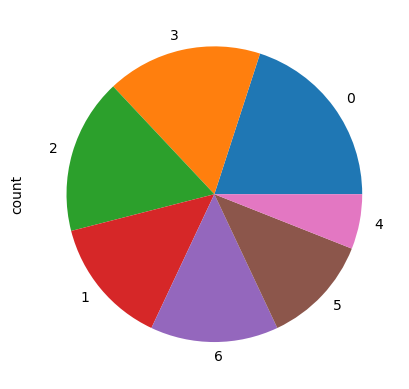

In [445]:
data['Virtual Merchandise Purchases'].value_counts().plot(kind='pie')

<Axes: title={'center': 'Time on Live 360 in minutes'}, xlabel='Time Spent (mins)', ylabel='Frequency (# of users with specific time spent)'>

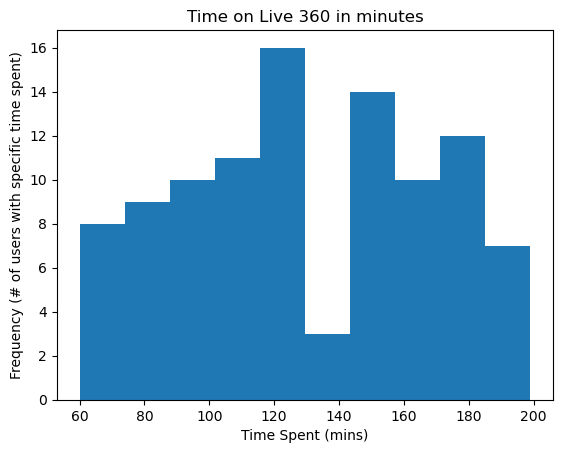

In [423]:
data['Time on Live 360 (mins)'].plot(kind='hist', title = "Time on Live 360 in minutes", 
                                    xlabel = 'Time Spent (mins)', ylabel = 'Frequency (# of users with specific time spent)')

In [407]:
data.corr().style.background_gradient(cmap='cool')

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster Group
User ID,1.000000,0.024949,0.016412,0.029424,0.015266,0.144269,0.227553,0.128196
Fan Challenges Completed,0.024949,1.000000,-0.105757,0.159378,-0.065239,0.002900,0.008089,-0.473530
Predictive Accuracy (%),0.016412,-0.105757,1.000000,0.022194,0.056612,0.125427,0.024295,0.172597
Virtual Merchandise Purchases,0.029424,0.159378,0.022194,1.000000,0.070550,-0.007527,-0.044676,-0.514020
Sponsorship Interactions (Ad Clicks),0.015266,-0.065239,0.056612,0.070550,1.000000,-0.073929,0.191292,-0.208002
Time on Live 360 (mins),0.144269,0.002900,0.125427,-0.007527,-0.073929,1.000000,0.050714,0.120799
Real-Time Chat Activity (Messages Sent),0.227553,0.008089,0.024295,-0.044676,0.191292,0.050714,1.000000,0.018641
Cluster Group,0.128196,-0.473530,0.172597,-0.514020,-0.208002,0.120799,0.018641,1.000000


## New Challenge

#### Propose a new fan challenge based on your analysis, with predicted outcomes for engagement and monetization. 


#### Fan Challenge: Enter Constest! Compete against other users to complete the most Fan Challenges in the next 30 days. Winners will receive discounts to the Virtual Merchandise Shop. 

#### The top 25 users will receive a 10% discount.
#### The top 10 users will receive a 15% discount
#### The top 5 users will receive a 20% discount
#### And the #1 user will receive a 50% discount to the shop.

#### Due to the correlation between Fan Challenges Completed and Virtual Merchandise Purchases it can be argued that encouraging more users to participate in challenges, along with a discount to the store, you could see this correlation rise substantially. Additionally, it would be boosting company sales. 